In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv('keller_dataset.csv', index_col=0)
dataset

,Acid,Ammonia,Bakery,Burnt,Chemical,Cold,Decayed,Familiarity,Fish,Flower,...,nAtom,ATS1Z,ATS1d,nBridgehead,nAromBond,nH,ATS1v,ATS0dv,VMcGowan,Sare
CID,,,,,,,,,,,,,,,,,,,,,
126,3.916667,2.297619,0.607143,1.421687,12.523810,3.317647,4.250000,39.314607,0.301205,6.807229,...,15.0,386.0,54.0,0.0,6.0,6.0,4225.774029,138.0,93.17,15.08
176,2.470588,4.676471,2.171429,3.200000,10.055556,4.176471,4.176471,39.395833,2.235294,7.114286,...,8.0,158.0,13.0,0.0,0.0,4.0,1455.199386,78.0,46.48,8.32
177,3.852459,2.524590,5.540984,1.419355,9.781250,4.396825,3.580645,39.135135,0.833333,3.754098,...,7.0,108.0,9.0,0.0,0.0,4.0,1185.192869,46.0,40.61,6.92
180,3.327586,4.406780,2.105263,3.362069,8.885246,8.033333,3.950000,39.750000,2.844828,6.982759,...,10.0,156.0,15.0,0.0,0.0,6.0,1838.183004,54.0,54.70,9.68
196,5.696429,1.833333,1.581818,3.018519,8.719298,4.105263,4.963636,39.428571,0.425926,3.851852,...,20.0,436.0,54.0,0.0,0.0,10.0,4410.422709,170.0,110.28,20.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6114390,2.500000,6.959184,7.780000,4.212121,6.464646,2.734694,0.777778,62.240385,0.959184,11.843137,...,39.0,960.0,142.0,0.0,12.0,18.0,10778.693935,284.0,225.97,38.04
6429333,2.400000,3.750000,2.000000,0.585366,7.113636,1.795455,1.325581,32.232143,1.075000,3.121951,...,21.0,468.0,70.0,0.0,6.0,10.0,5685.264683,132.0,125.27,20.20
6999977,1.338028,1.013889,6.242857,3.169014,9.084507,1.385714,4.971429,46.418919,0.157143,3.619718,...,24.0,458.0,60.0,0.0,0.0,14.0,4902.092160,136.0,122.80,23.52


In [316]:
# ['Acid', 'Ammonia', 'Bakery', 'Burnt', 'Chemical', 'Cold', 'Decayed','Familiarity',
#  'Fish', 'Flower', 'Fruit', 'Garlic', 'Grass', 'Intensity', 'Musky', 'Pleasantness',
#  'Sour', 'Spices', 'Sweaty','Sweet', 'Warm', 'Wood']
# target_cols = dataset.columns[:22].drop(['Familiarity'])
# target_cols = ['Fish', 'Flower', 'Fruit', 'Spices', 'Sweaty', 'Wood']
target_cols = ['Pleasantness']
target_cols

['Pleasantness']

In [317]:
# feature_cols = dataset.columns[22:22+93]
feature_cols = dataset.columns[22:22+93]
feature_cols

Index(['ATS0d', 'AATS0d', 'SMR_VSA1', 'JGT10', 'ATS0m', 'ATSC1p', 'ATSC5d',
       'nHBDon', 'MIC0', 'nBondsD', 'Xch-3dv', 'ATSC4dv', 'n9FRing',
       'nFaHRing', 'AATS1m', 'SIC3', 'n3Ring', 'ATSC6i', 'ATSC6c', 'SdsN',
       'NddC', 'nBondsT', 'NssS', 'n8FRing', 'n4Ring', 'n7HRing', 'nG12Ring',
       'nBase', 'ATSC4se', 'n10FARing', 'SaaS', 'NddssS', 'C2SP1', 'NsSH',
       'n5AHRing', 'SsSH', 'n10FAHRing', 'SdCH2', 'NdssS', 'SaaNH', 'NaaNH',
       'NsssN', 'EState_VSA4', 'SssNH', 'NdsCH', 'PEOE_VSA10', 'PEOE_VSA3',
       'JGI9', 'Lipinski', 'ATSC8c', 'PEOE_VSA4', 'EState_VSA8', 'NaasN',
       'PEOE_VSA13', 'EState_VSA7', 'PEOE_VSA8', 'JGI8', 'EState_VSA6',
       'EState_VSA3', 'JGI4', 'PEOE_VSA5', 'JGI6', 'JGI5', 'PEOE_VSA12',
       'SlogP_VSA10', 'JGI3', 'SlogP_VSA8', 'JGI7', 'PEOE_VSA7', 'EState_VSA9',
       'GhoseFilter', 'SlogP_VSA3', 'RPCG', 'ATSC3Z', 'SsssCH', 'EState_VSA5',
       'RNCG', 'SlogP_VSA4', 'VSA_EState5', 'Xc-6d', 'C1SP2', 'n6aHRing',
       'nAcid', 'Xc-6d

In [318]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import KFold
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd

# Define your MLP model
class MLP(nn.Module):
    def __init__(self, input_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        return x

# Define custom PyTorch dataset
class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.float32)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

# Define training function
def train_model(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    return running_loss / len(train_loader.dataset)

# Define evaluation function
def evaluate_model(model, val_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            running_loss += loss.item() * inputs.size(0)
    return running_loss / len(val_loader.dataset)

def evaluate_accuracy(model, dataloader, device, margin=0.1):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            total += targets.size(0) * targets.size(1)
            correct += (abs(outputs - targets) < (targets*margin).clip(0.1,100)).sum().item()

    return correct / total

# Prepare data
features = dataset[feature_cols].values
labels = dataset[target_cols].values

KFOLDS = 5
EPOCHS = 150

train_losses = []
val_losses = []

train_accs = {0.1: [], 0.25: [], 0.5: []}
val_accs = {0.1: [], 0.25: [], 0.5: []}

# Initialize cross-validation
kf = KFold(n_splits=KFOLDS, shuffle=True, random_state=42)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Cross-validation loop
for fold, (train_idx, val_idx) in enumerate(kf.split(features, labels)):
    print(f'Fold {fold + 1}')

    # Split data into train and validation sets
    train_features, val_features = features[train_idx], features[val_idx]
    train_labels, val_labels = labels[train_idx], labels[val_idx]

    # Create DataLoader for training and validation
    train_dataset = CustomDataset(train_features, train_labels)
    val_dataset = CustomDataset(val_features, val_labels)
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=64)

    # Initialize model, criterion, and optimizer
    model = MLP(input_size=len(feature_cols), output_size=len(target_cols)).to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training loop
    train_losses_fold = []
    val_losses_fold = []
    train_accuracies_fold = {0.1: [], 0.25: [], 0.5: []}
    val_accuracies_fold = {0.1: [], 0.25: [], 0.5: []}
    for epoch in tqdm(range(EPOCHS), desc="Epoch"):
        train_loss = train_model(model, train_loader, criterion, optimizer, device)
        val_loss = evaluate_model(model, val_loader, criterion, device)
        train_losses_fold.append(train_loss)
        val_losses_fold.append(val_loss)

        # Calculate and store accuracy
        for margin in train_accs:
            train_acc = evaluate_accuracy(model, train_loader, device, margin)
            val_acc = evaluate_accuracy(model, val_loader, device, margin)
            train_accuracies_fold[margin].append(train_acc)
            val_accuracies_fold[margin].append(val_acc)

        print(f"Epoch {epoch + 1}/{EPOCHS}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")

    train_losses.append(train_losses_fold)
    val_losses.append(val_losses_fold)
    for margin in train_accs:
        train_accs[margin].append(train_accuracies_fold[margin])
        val_accs[margin].append(val_accuracies_fold[margin])

Fold 1


Epoch:   0%|          | 0/150 [00:00<?, ?it/s]

Epoch 1/150, Train Loss: 1825.2183, Val Loss: 5440.2081, Train Acc: 0.6068, Val Acc: 0.5938
Epoch 2/150, Train Loss: 958.8992, Val Loss: 7319.5773, Train Acc: 0.7604, Val Acc: 0.7396
Epoch 3/150, Train Loss: 915.2899, Val Loss: 4304.3969, Train Acc: 0.5365, Val Acc: 0.5208
Epoch 4/150, Train Loss: 552.9218, Val Loss: 8396.8914, Train Acc: 0.7943, Val Acc: 0.7917
Epoch 5/150, Train Loss: 363.0378, Val Loss: 13575.1968, Train Acc: 0.8099, Val Acc: 0.8021
Epoch 6/150, Train Loss: 386.8929, Val Loss: 10275.5468, Train Acc: 0.8073, Val Acc: 0.8021
Epoch 7/150, Train Loss: 357.2366, Val Loss: 9575.0845, Train Acc: 0.8047, Val Acc: 0.8229
Epoch 8/150, Train Loss: 350.1026, Val Loss: 10736.5937, Train Acc: 0.8203, Val Acc: 0.8229
Epoch 9/150, Train Loss: 333.2776, Val Loss: 10027.6501, Train Acc: 0.8151, Val Acc: 0.8021
Epoch 10/150, Train Loss: 329.5554, Val Loss: 9712.2916, Train Acc: 0.8099, Val Acc: 0.8125
Epoch 11/150, Train Loss: 328.2322, Val Loss: 9897.5499, Train Acc: 0.8177, Val Acc:

Epoch:   0%|          | 0/150 [00:00<?, ?it/s]

Epoch 1/150, Train Loss: 3158.3207, Val Loss: 504.2253, Train Acc: 0.7344, Val Acc: 0.6354
Epoch 2/150, Train Loss: 2603.5215, Val Loss: 1197.5823, Train Acc: 0.0911, Val Acc: 0.1562
Epoch 3/150, Train Loss: 1575.0780, Val Loss: 1588.1072, Train Acc: 0.0156, Val Acc: 0.0417
Epoch 4/150, Train Loss: 1612.0235, Val Loss: 1507.1451, Train Acc: 0.0182, Val Acc: 0.0417
Epoch 5/150, Train Loss: 1542.3680, Val Loss: 1210.2587, Train Acc: 0.0859, Val Acc: 0.1458
Epoch 6/150, Train Loss: 1352.7768, Val Loss: 1035.6839, Train Acc: 0.1432, Val Acc: 0.1979
Epoch 7/150, Train Loss: 1346.3397, Val Loss: 856.0351, Train Acc: 0.2891, Val Acc: 0.3125
Epoch 8/150, Train Loss: 1256.7163, Val Loss: 772.4532, Train Acc: 0.3724, Val Acc: 0.3958
Epoch 9/150, Train Loss: 1235.8808, Val Loss: 746.8165, Train Acc: 0.4167, Val Acc: 0.4062
Epoch 10/150, Train Loss: 1139.3552, Val Loss: 803.7882, Train Acc: 0.3281, Val Acc: 0.3438
Epoch 11/150, Train Loss: 1059.9103, Val Loss: 706.8789, Train Acc: 0.4661, Val Acc:

Epoch:   0%|          | 0/150 [00:00<?, ?it/s]

Epoch 1/150, Train Loss: 1957.9941, Val Loss: 874.9252, Train Acc: 0.2917, Val Acc: 0.2917
Epoch 2/150, Train Loss: 1866.4194, Val Loss: 1291.2233, Train Acc: 0.0859, Val Acc: 0.0625
Epoch 3/150, Train Loss: 1539.1710, Val Loss: 1170.0948, Train Acc: 0.1120, Val Acc: 0.1354
Epoch 4/150, Train Loss: 1444.2226, Val Loss: 1097.4720, Train Acc: 0.1354, Val Acc: 0.1354
Epoch 5/150, Train Loss: 1421.3935, Val Loss: 1102.2073, Train Acc: 0.1328, Val Acc: 0.1458
Epoch 6/150, Train Loss: 1582.0542, Val Loss: 743.9124, Train Acc: 0.4141, Val Acc: 0.4688
Epoch 7/150, Train Loss: 1163.7753, Val Loss: 837.8751, Train Acc: 0.2995, Val Acc: 0.3542
Epoch 8/150, Train Loss: 1129.3873, Val Loss: 844.6514, Train Acc: 0.2865, Val Acc: 0.3646
Epoch 9/150, Train Loss: 1217.7044, Val Loss: 966.5092, Train Acc: 0.2214, Val Acc: 0.2812
Epoch 10/150, Train Loss: 1051.2665, Val Loss: 557.5100, Train Acc: 0.6094, Val Acc: 0.6146
Epoch 11/150, Train Loss: 931.3244, Val Loss: 640.2937, Train Acc: 0.5286, Val Acc: 0

Epoch:   0%|          | 0/150 [00:00<?, ?it/s]

Epoch 1/150, Train Loss: 2982.2345, Val Loss: 2070.0346, Train Acc: 0.4870, Val Acc: 0.3542
Epoch 2/150, Train Loss: 1305.4952, Val Loss: 1613.0920, Train Acc: 0.1797, Val Acc: 0.1042
Epoch 3/150, Train Loss: 1371.0509, Val Loss: 1627.3138, Train Acc: 0.0703, Val Acc: 0.0521
Epoch 4/150, Train Loss: 1415.4908, Val Loss: 1629.6259, Train Acc: 0.1042, Val Acc: 0.0625
Epoch 5/150, Train Loss: 1338.1355, Val Loss: 1602.1737, Train Acc: 0.1823, Val Acc: 0.0938
Epoch 6/150, Train Loss: 1274.8734, Val Loss: 1710.0166, Train Acc: 0.3073, Val Acc: 0.1979
Epoch 7/150, Train Loss: 1375.1971, Val Loss: 1916.2090, Train Acc: 0.4688, Val Acc: 0.3229
Epoch 8/150, Train Loss: 1314.7452, Val Loss: 1750.5838, Train Acc: 0.3047, Val Acc: 0.1979
Epoch 9/150, Train Loss: 1297.2712, Val Loss: 1686.1097, Train Acc: 0.1510, Val Acc: 0.0938
Epoch 10/150, Train Loss: 1150.9357, Val Loss: 1884.8003, Train Acc: 0.3438, Val Acc: 0.2083
Epoch 11/150, Train Loss: 1073.3236, Val Loss: 2036.3624, Train Acc: 0.4271, Va

Epoch:   0%|          | 0/150 [00:00<?, ?it/s]

Epoch 1/150, Train Loss: 2297.2878, Val Loss: 1037.0709, Train Acc: 0.1380, Val Acc: 0.1667
Epoch 2/150, Train Loss: 1672.8334, Val Loss: 1669.0428, Train Acc: 0.0104, Val Acc: 0.0104
Epoch 3/150, Train Loss: 1620.5769, Val Loss: 1202.0374, Train Acc: 0.0964, Val Acc: 0.0729
Epoch 4/150, Train Loss: 1444.4366, Val Loss: 917.9067, Train Acc: 0.2344, Val Acc: 0.2292
Epoch 5/150, Train Loss: 1379.3437, Val Loss: 950.1568, Train Acc: 0.2161, Val Acc: 0.1979
Epoch 6/150, Train Loss: 1332.9173, Val Loss: 891.6346, Train Acc: 0.2734, Val Acc: 0.2292
Epoch 7/150, Train Loss: 1264.1027, Val Loss: 1030.9819, Train Acc: 0.1589, Val Acc: 0.1562
Epoch 8/150, Train Loss: 1198.4749, Val Loss: 852.8695, Train Acc: 0.2969, Val Acc: 0.2292
Epoch 9/150, Train Loss: 1209.6930, Val Loss: 683.5426, Train Acc: 0.4661, Val Acc: 0.4688
Epoch 10/150, Train Loss: 1124.2974, Val Loss: 825.8705, Train Acc: 0.3229, Val Acc: 0.2812
Epoch 11/150, Train Loss: 995.7326, Val Loss: 719.8871, Train Acc: 0.4401, Val Acc: 0

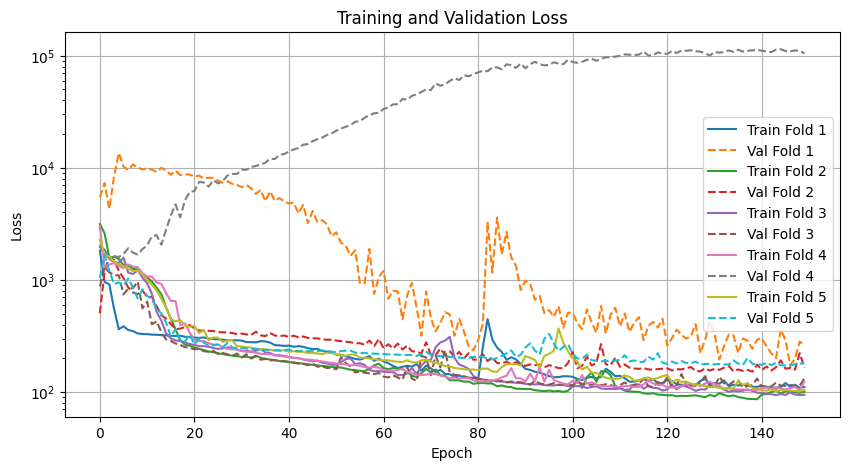

In [319]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 5))
for fold in range(len(train_losses)):
    plt.plot(range(EPOCHS), train_losses[fold], label=f'Train Fold {fold + 1}')
    plt.plot(range(EPOCHS), val_losses[fold], label=f'Val Fold {fold + 1}', linestyle='--')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.show()

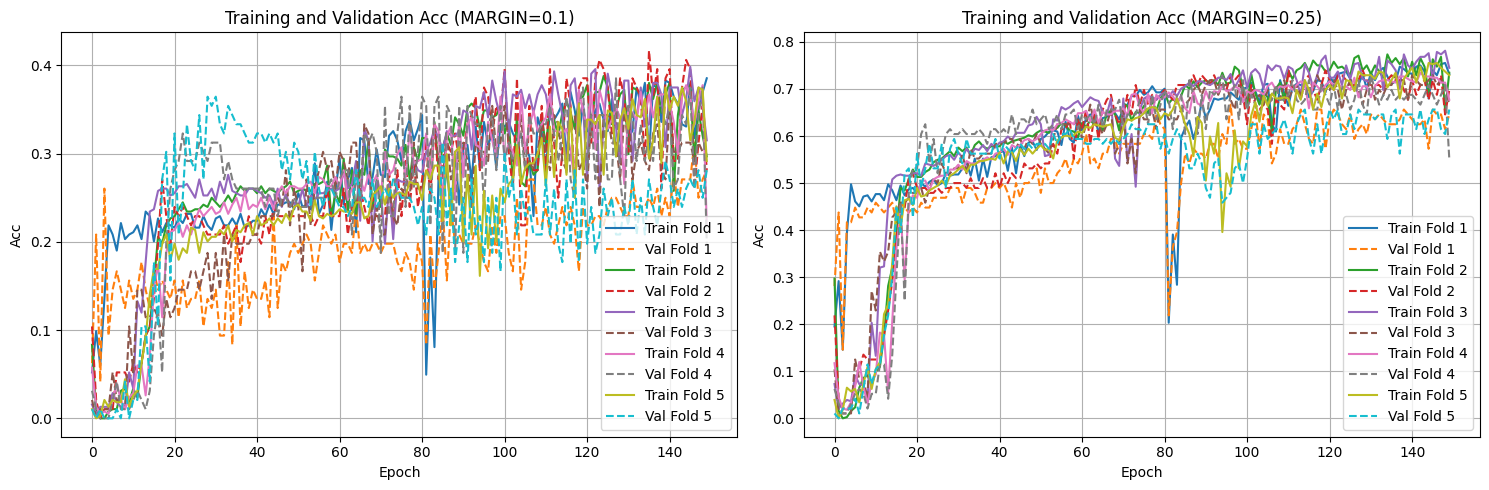

In [320]:
import matplotlib.pyplot as plt

# Define MARGIN values
MARGIN_VALUES = [0.1, 0.25]

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

for idx, margin in enumerate(MARGIN_VALUES):
    train_accs_margin = train_accs[margin]
    val_accs_margin = val_accs[margin]
    for fold in range(len(train_accs_margin)):
        axs[idx].plot(range(EPOCHS), train_accs_margin[fold], label=f'Train Fold {fold + 1}')
        axs[idx].plot(range(EPOCHS), val_accs_margin[fold], label=f'Val Fold {fold + 1}', linestyle='--')
    axs[idx].set_title(f'Training and Validation Acc (MARGIN={margin})')
    axs[idx].set_xlabel('Epoch')
    axs[idx].set_ylabel('Acc')
    axs[idx].grid(True)
    axs[idx].legend()

plt.tight_layout()
plt.show()